# Bài 4: K-means Clustering

### 1. Giới thiệu

- Trong bài trước, chúng ta đã làm quen với thuật toán Linear Regression - là thuật toán đơn giản nhất trong Supervised learning. Bài này tôi sẽ giới thiệu một trong những thuật toán cơ bản nhất trong Unsupervised learning - thuật toán K-means clustering (phân cụm K-means).

- Trong thuật toán K-means clustering, chúng ta không biết nhãn (label) của từng điểm dữ liệu. Mục đích là làm thế nào để phân dữ liệu thành các cụm (cluster) khác nhau sao cho "dữ liệu trong cùng một cụm có tính chất giống nhau".

Ví dụ: Một công ty muốn tạo ra những chính sách ưu đãi cho những nhóm khách hàng khác nhau dựa trên sự tương tác giữa mỗi khách hàng với công ty đó (số năm là khách hàng, số tiền khách hàng đã chi trả cho công ty, độ tuổi, giới tính, thành phố, nghề nghiệp,...). Giả sử công ty đó có rất nhiều dữ liệu của rất nhiều khách hàng nhưng chưa có cách nào chia toàn bộ khách hàng đó thành một số nhóm/cụm khác nhau. Nếu một người biết Machine Learning được đặt câu hỏi này, phương pháp đầu tiên anh (chị) ta nghĩ đến là K-means Clustering. Vì nó là một trong những thuật toán đầu tiên mà ... Sau khi đã phân ra được từng nhóm, nhân viên công ty đó có thể lựa chọn ra một vài khách hàng trong mỗi nhóm để quyết định xem mỗi nhóm tương ứng với nhóm khách hàng nào. Phần việc cuối cùng này cần sự can thiệp của con người, nhưng lượng công việc đã được rút gọn đi rất nhiều. 

In [ ]:
import matplotlib.pyplot as plt
import cv2

(np.float64(-0.5), np.float64(560.5), np.float64(431.5), np.float64(-0.5))

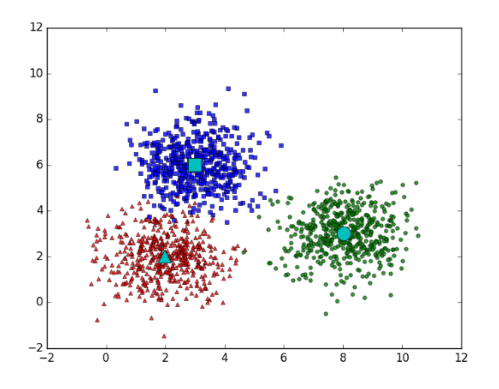

In [5]:
img = cv2.imread('ex.png')

plt.imshow(img)
plt.axis('off')  # Hide axes

- Giả sử mỗi clustering có một điểm đại diện (center) màu vàng. Và những điểm xung quanh mỗi center thuộc vào cùng một nhóm với center đó. Một cách đơn giản nhất, xét một điểm bất kỳ, ta xét xem điểm đó gần với center nào nhất thì nó thuộc về cùng nhóm với center đó. Tới đây, chúng ta có một bài toán thú vị: Trên một vùng biển hình vuông lớn có ba đảo hình vuông, tam giác, và tròn màu vàng như hình trên. Một điểm trên biển được gọi là thuộc lãnh hải của một đảo nếu nó nằm gần đảo này hơn so với hai đảo kia. Hãy xác định ranh giới lãnh hải của hai đảo.
- Dưới đây là ví dụ cho 5 đảo:

TypeError: Image data of dtype object cannot be converted to float

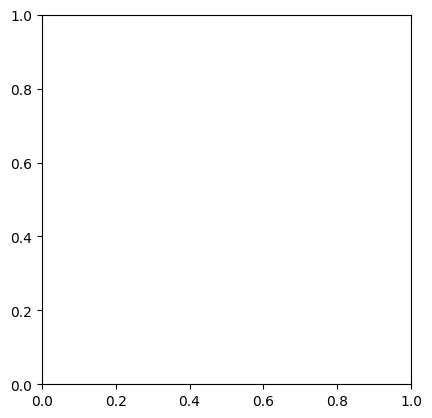

In [ ]:
img2 = cv2.imread('ex2.png')

plt.imshow(img2)
plt.axis('off')  # Hide axes